## Visits by Browser (mini-project)

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

**Graph user type visits distribution by date**

In [4]:
# reading dataset
people_vs_bots = pd.read_csv('step_1_lesson_7.csv')

people_vs_bots

,date,user_type,visits
0,2020-06-15,People,417.0
1,2020-06-15,Robots,177.0
2,2020-06-16,People,472.0
3,2020-06-16,Robots,91.0
4,2020-06-17,People,475.0
5,2020-06-17,Robots,138.0


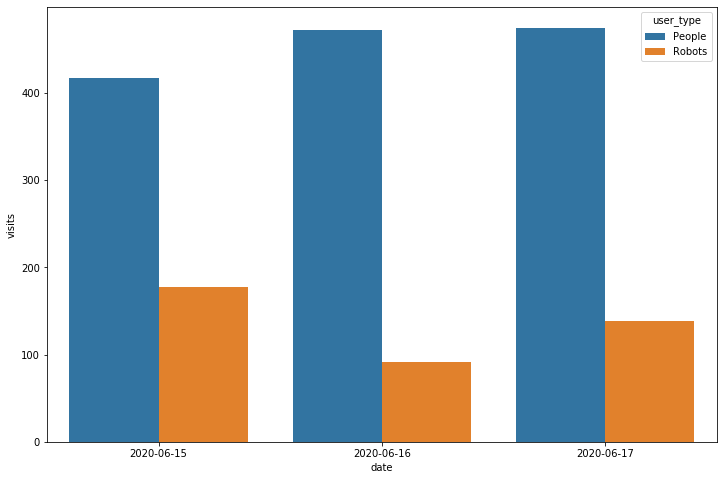

In [6]:
# plotting data
plt.figure(figsize=(12, 8))
sns.barplot(hue='user_type', data=people_vs_bots, x='date', y='visits');

**Define the percentage of visits made from Google Chrome**

In [158]:
# reading data
browser_visits = pd.read_csv('step_2_lesson_7.csv')

browser_visits

,date,browser,visits
0,2020-06-15,Google Chrome,354.0
1,2020-06-15,Firefox,58.0
2,2020-06-15,Yandex Browser,54.0
3,2020-06-15,Safari,41.0
4,2020-06-15,Chrome Mobile,31.0
5,2020-06-15,Opera,16.0
6,2020-06-15,Mobile Safari,16.0
7,2020-06-15,Samsung Internet,9.0
8,2020-06-15,Edge,5.0
9,2020-06-15,UCWEB,4.0


In [160]:
# defining percentage of visits
visits_per_browser = browser_visits.groupby('browser') \
    .agg({'visits': 'sum'})

round(visits_per_browser.loc['Google Chrome'] / visits_per_browser.sum() * 100, 0)

visits    60.0
dtype: float64

**What browser does have the most bots to users visits rate?**

In [180]:
# reading data
visits_by_user = pd.read_csv('step_3_lesson_7.csv')

visits_by_user

,date,browser,user_type,visits
0,2020-06-15,Google Chrome,People,250.0
1,2020-06-15,Google Chrome,Robots,104.0
2,2020-06-15,Yandex Browser,People,47.0
3,2020-06-15,Firefox,Robots,31.0
4,2020-06-15,Chrome Mobile,People,31.0
5,2020-06-15,Firefox,People,27.0
6,2020-06-15,Safari,Robots,22.0
7,2020-06-15,Safari,People,19.0
8,2020-06-15,Mobile Safari,People,15.0
9,2020-06-15,Opera,People,11.0


In [181]:
# aggregating and pivoting 
user_type = visits_by_user.groupby(['browser', 'user_type'], as_index=False) \
    .agg({'visits': 'sum'}) \
    .pivot(index='browser', columns='user_type', values='visits') \
    .fillna(0) \

# defining bots to user rate
user_type.assign(bots_rate = user_type.Robots / (user_type.Robots + user_type.People)) \
    .sort_values('bots_rate') \
    .tail(1)

user_type,People,Robots,bots_rate
browser,,,
UCWEB,0.0,4.0,1.0


**Check the overall proportion of visits for each browser and user type**

In [190]:
# reading data
for_visits_rate = pd.read_csv('step_4_lesson_7.csv')

for_visits_rate.head(7)

,date,browser,user_type,visits
0,2020-06-15,Google Chrome,People,250.0
1,2020-06-15,Google Chrome,Robots,104.0
2,2020-06-15,Yandex Browser,People,47.0
3,2020-06-15,Firefox,Robots,31.0
4,2020-06-15,Chrome Mobile,People,31.0
5,2020-06-15,Firefox,People,27.0
6,2020-06-15,Safari,Robots,22.0


In [191]:
# calculating proportion of visits and adding it to a new column
visits_rate = for_visits_rate.assign(rate = round(100* (for_visits_rate.visits / for_visits_rate.visits.sum()), 1))

visits_rate

,date,browser,user_type,visits,rate
0,2020-06-15,Google Chrome,People,250.0,42.1
1,2020-06-15,Google Chrome,Robots,104.0,17.5
2,2020-06-15,Yandex Browser,People,47.0,7.9
3,2020-06-15,Firefox,Robots,31.0,5.2
4,2020-06-15,Chrome Mobile,People,31.0,5.2
5,2020-06-15,Firefox,People,27.0,4.5
6,2020-06-15,Safari,Robots,22.0,3.7
7,2020-06-15,Safari,People,19.0,3.2
8,2020-06-15,Mobile Safari,People,15.0,2.5
9,2020-06-15,Opera,People,11.0,1.9


**Download data from Google Docs, join it with your dataset and calculate visits to users rate**

In [193]:
# downloading data from Google Docs via a link and reading it to a dataframe
from io import BytesIO
import requests
r = requests.get('https://docs.google.com/spreadsheets/d/e/2PACX-1vQWMsvBTVio9C7IOOxfFO9C15BRHyME-_ENHqBodDOjuiHwk9fCuF5hUVmDs497PZOqPYK3exdSikOK/pub?gid=1006633900&single=true&output=csv')
data = r.content

df = pd.read_csv(BytesIO(data))

df

,date,browser,user_type,users
0,2020-06-15,Google Chrome,People,240.0
1,2020-06-15,Google Chrome,Robots,104.0
2,2020-06-15,Yandex Browser,People,44.0
3,2020-06-15,Chrome Mobile,People,30.0
4,2020-06-15,Firefox,Robots,29.0
5,2020-06-15,Firefox,People,26.0
6,2020-06-15,Safari,Robots,20.0
7,2020-06-15,Safari,People,17.0
8,2020-06-15,Mobile Safari,People,14.0
9,2020-06-15,Opera,People,10.0


In [202]:
# merging two datasets
df_both = for_visits_rate.merge(df)
df_both

,date,browser,user_type,visits,users
0,2020-06-15,Google Chrome,People,250.0,240.0
1,2020-06-15,Google Chrome,Robots,104.0,104.0
2,2020-06-15,Yandex Browser,People,47.0,44.0
3,2020-06-15,Firefox,Robots,31.0,29.0
4,2020-06-15,Chrome Mobile,People,31.0,30.0
5,2020-06-15,Firefox,People,27.0,26.0
6,2020-06-15,Safari,Robots,22.0,20.0
7,2020-06-15,Safari,People,19.0,17.0
8,2020-06-15,Mobile Safari,People,15.0,14.0
9,2020-06-15,Opera,People,11.0,10.0


In [207]:
# calculating visits to users proportion
full_data = df_both.assign(visits_users_rate = round(df_both.visits / df_both.users, 2))

full_data

,date,browser,user_type,visits,users,visits_users_rate
0,2020-06-15,Google Chrome,People,250.0,240.0,1.04
1,2020-06-15,Google Chrome,Robots,104.0,104.0,1.00
2,2020-06-15,Yandex Browser,People,47.0,44.0,1.07
3,2020-06-15,Firefox,Robots,31.0,29.0,1.07
4,2020-06-15,Chrome Mobile,People,31.0,30.0,1.03
5,2020-06-15,Firefox,People,27.0,26.0,1.04
6,2020-06-15,Safari,Robots,22.0,20.0,1.10
7,2020-06-15,Safari,People,19.0,17.0,1.12
8,2020-06-15,Mobile Safari,People,15.0,14.0,1.07
9,2020-06-15,Opera,People,11.0,10.0,1.10


In [208]:
# quering data for Google Chrome browser and bots user type
full_data.query('browser == "Google Chrome" & user_type == "Robots"')

,date,browser,user_type,visits,users,visits_users_rate
1,2020-06-15,Google Chrome,Robots,104.0,104.0,1.0
